In [1]:
##### Misclassified

In [180]:
import pandas as pd
import os
import torch
import numpy as np
import scipy.stats as stats
from pprint import pprint
import matplotlib.pyplot as plt

config = {
    "runs_folder": "final_data_2",
    "results_folder": "/storage/scratch/groshchupkin/Tom_dataset/results/",
    "data_path": "/storage/scratch/groshchupkin/Tom_dataset/"
}
class_info = "classification_info_test.csv"

runs_folder = os.listdir(config["results_folder"] + config["runs_folder"])
run_paths = {
    "bionet": dict(),
    "logreg": dict(),
}

for folder in runs_folder:
    if "bionet" in folder:
        seed = folder.split("_")[-1]
        run_paths["bionet"][f"seed_{seed}"] = config["results_folder"] + config["runs_folder"] + f"/{folder}/"
    else:
        seed = folder.split("_")[-1]
        run_paths["logreg"][f"seed_{seed}"] = config["results_folder"] + config["runs_folder"] + f"/{folder}/"

In [181]:
# df=[original_index][true_label][depression_score]
# ++[wrong_label_count][total_test_classification_count]
# 1. Make a table with original index length
# 2. Add true class
# 3. Rows of zeros for wrong_label_count, total_test_classification_count

data = pd.read_csv(config["data_path"] + "/dataset.csv")

misclass = data.iloc[:,:3].copy()
misclass['original_index'] = misclass.index
misclass = misclass[['original_index', 'depression_label', 'depression_score']]
misclass['wrong_label_count'] = 0
misclass['total_test_classification_count'] = 0

for _, seed_path in run_paths["bionet"].items():
    seed_misclass = pd.read_csv(seed_path + class_info)
    
    for _, row in seed_misclass.iterrows():
        original_index = round(row['original_index'])
        true_class = round(row['true_class'])
        predicted_class = round(row['predicted_class'])
        is_misclass = true_class != predicted_class

        if not original_index in misclass['original_index'].values:
            print("No row with this original_index")
            
        misclass.loc[misclass['original_index'] == original_index, 'total_test_classification_count'] += 1

        if is_misclass:
            misclass.loc[misclass['original_index'] == original_index, 'wrong_label_count'] += 1

misclass['wrong_label_percentage'] = round(100 * (misclass['wrong_label_count'] / misclass['total_test_classification_count']))
misclass['wrong_label_percentage'] = misclass['wrong_label_percentage'].astype('int64')
misclass['depression_score'] = misclass['depression_score'].round().astype(int)

In [1]:
# misclass

In [183]:
# Save the table
misclass.to_csv(config["results_folder"] + "bionet_misclassification.csv", index=False)
bionet_misclass = pd.read_csv(config["results_folder"] + "bionet_misclassification.csv")

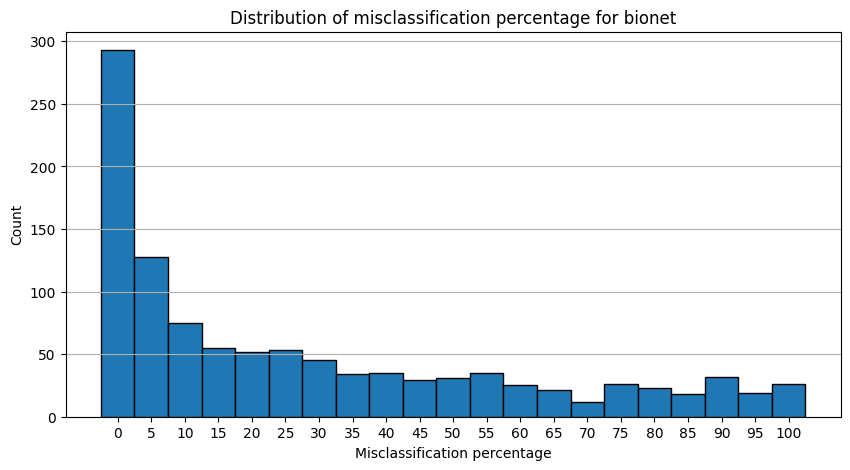

In [126]:
plt.figure(figsize=(10, 5))
plt.hist(bionet_misclass['wrong_label_percentage'], bins=range(0, 110, 5), edgecolor='black', align='left')
plt.xlabel('Misclassification percentage')
plt.ylabel('Count')
plt.title('Distribution of misclassification percentage for bionet')
plt.xticks(range(0, 105, 5))
plt.grid(axis='y')
plt.savefig('bionet_misclassified_label_percentage_distribution.png', dpi=300)
plt.show()

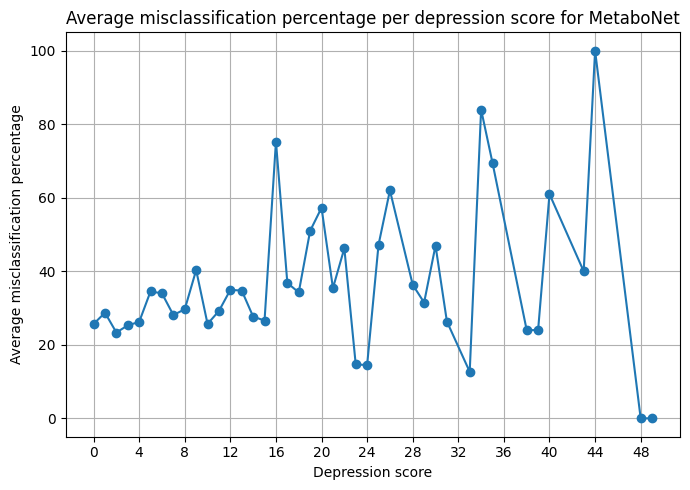

In [135]:
average_wrong_label_percentage = bionet_misclass.groupby('depression_score')['wrong_label_percentage'].mean().reset_index()
plt.figure(figsize=(7, 5))
plt.plot(average_wrong_label_percentage['depression_score'], average_wrong_label_percentage['wrong_label_percentage'], marker='o', linestyle='-')
plt.xlabel('Depression score')
plt.ylabel('Average misclassification percentage')
plt.title('Average misclassification percentage per depression score for MetaboNet')
plt.grid(True)

# Set x-axis ticks to every 4 steps, while maintaining the grid for every score step
plt.xticks(range(min(average_wrong_label_percentage['depression_score']), 
                 max(average_wrong_label_percentage['depression_score']) + 1, 4))

# Add minor grid lines for every score step
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.grid(which='minor', axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('bionet_misclassified_per_score.png', dpi=300)
plt.show()

In [129]:
########## logreg #################

In [143]:
data = pd.read_csv(config["data_path"] + "/dataset.csv")

misclass = data.iloc[:,:3].copy()
misclass['original_index'] = misclass.index
misclass = misclass[['original_index', 'depression_label', 'depression_score']]
misclass['wrong_label_count'] = 0
misclass['total_test_classification_count'] = 0

for _, seed_path in run_paths["logreg"].items():
    seed_misclass = pd.read_csv(seed_path + class_info)
    
    for _, row in seed_misclass.iterrows():
        original_index = round(row['original_index'])
        true_class = round(row['true_class'])
        predicted_class = round(row['predicted_class'])
        is_misclass = true_class != predicted_class

        if not original_index in misclass['original_index'].values:
            print("No row with this original_index")
            
        misclass.loc[misclass['original_index'] == original_index, 'total_test_classification_count'] += 1

        if is_misclass:
            misclass.loc[misclass['original_index'] == original_index, 'wrong_label_count'] += 1

misclass['wrong_label_percentage'] = round(100 * (misclass['wrong_label_count'] / misclass['total_test_classification_count']))
misclass['wrong_label_percentage'] = misclass['wrong_label_percentage'].astype('int64')
misclass['depression_score'] = misclass['depression_score'].round().astype(int)

In [144]:
misclass.to_csv(config["results_folder"] + "logreg_misclassification.csv", index=False)
logreg_misclass = pd.read_csv(config["results_folder"] + "logreg_misclassification.csv")

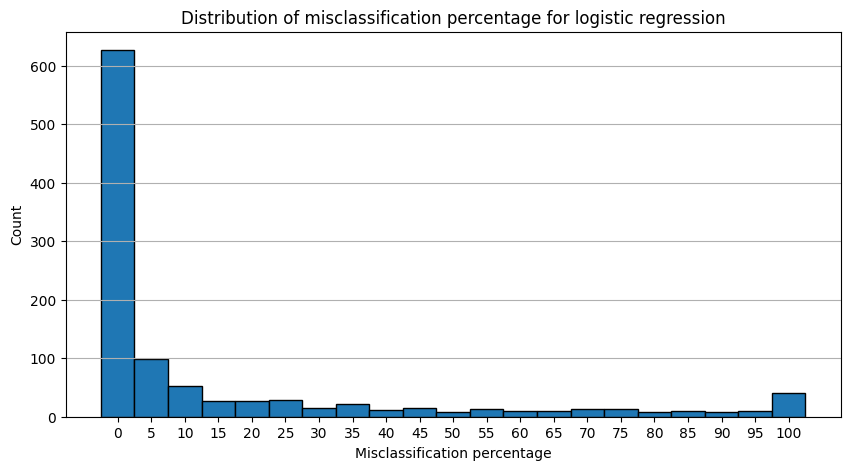

In [133]:
plt.figure(figsize=(10, 5))
plt.hist(logreg_misclass['wrong_label_percentage'], bins=range(0, 110, 5), edgecolor='black', align='left')
plt.xlabel('Misclassification percentage')
plt.ylabel('Count')
plt.title('Distribution of misclassification percentage for logistic regression')
plt.xticks(range(0, 105, 5))
plt.grid(axis='y')
plt.savefig('logreg_misclassified_label_percentage_distribution.png', dpi=300)
plt.show()

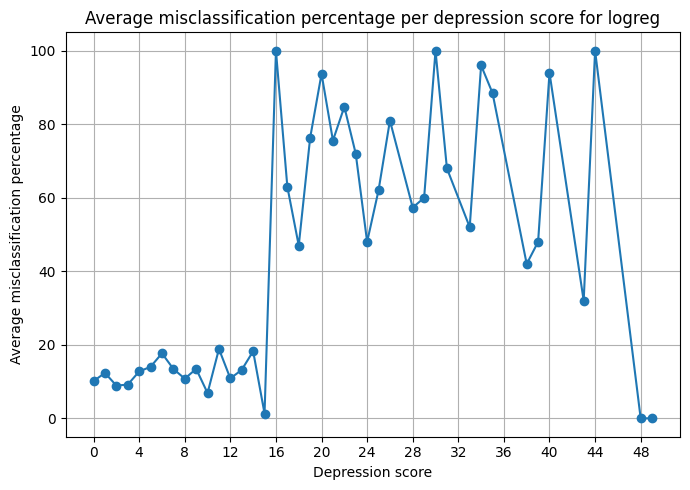

In [134]:
average_wrong_label_percentage = logreg_misclass.groupby('depression_score')['wrong_label_percentage'].mean().reset_index()
plt.figure(figsize=(7, 5))
plt.plot(average_wrong_label_percentage['depression_score'], average_wrong_label_percentage['wrong_label_percentage'], marker='o', linestyle='-')
plt.xlabel('Depression score')
plt.ylabel('Average misclassification percentage')
plt.title('Average misclassification percentage per depression score for logreg')
plt.grid(True)

# Set x-axis ticks to every 4 steps, while maintaining the grid for every score step
plt.xticks(range(min(average_wrong_label_percentage['depression_score']), 
                 max(average_wrong_label_percentage['depression_score']) + 1, 4))

# Add minor grid lines for every score step
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.grid(which='minor', axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('logreg_misclassified_per_score.png', dpi=300)
plt.show()

In [155]:
bionet_misclass = pd.read_csv(config["results_folder"] + "bionet_misclassification.csv")
logreg_misclass = pd.read_csv(config["results_folder"] + "logreg_misclassification.csv")

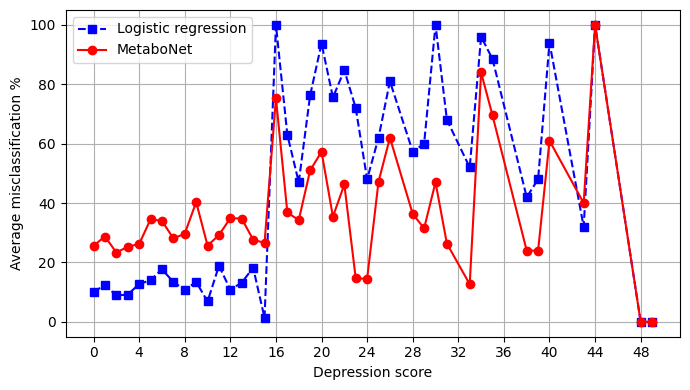

In [179]:
average_wrong_label_percentage_logreg = logreg_misclass.groupby('depression_score')['wrong_label_percentage'].mean().reset_index()
average_wrong_label_percentage_bionet = bionet_misclass.groupby('depression_score')['wrong_label_percentage'].mean().reset_index()

plt.figure(figsize=(7, 4))

# Plot for logreg
plt.plot(average_wrong_label_percentage_logreg['depression_score'], 
         average_wrong_label_percentage_logreg['wrong_label_percentage'], 
         marker='s', linestyle='--', label='Logistic regression', color="blue")

# Plot for bionet
plt.plot(average_wrong_label_percentage_bionet['depression_score'], 
         average_wrong_label_percentage_bionet['wrong_label_percentage'], 
         marker='o', linestyle='-', label='MetaboNet', color="red")

plt.xlabel('Depression score')
plt.ylabel('Average misclassification %')
# plt.title('Average misclassification % per depression score')
plt.grid(True)

# Set x-axis ticks to every 4 steps, while maintaining the grid for every score step
plt.xticks(range(min(average_wrong_label_percentage_logreg['depression_score']), 
                 max(average_wrong_label_percentage_logreg['depression_score']) + 1, 4))

# Add minor grid lines for every score step
plt.grid(which='minor', axis='x', linestyle='--', alpha=0.5)

# Add legend
plt.legend()

plt.tight_layout()
plt.savefig('misclassified_per_score.png', dpi=300)
plt.show()

In [163]:
average_wrong_label_percentage_logreg = logreg_misclass.groupby('depression_score')['wrong_label_percentage'].agg(['mean', 'std']).reset_index()

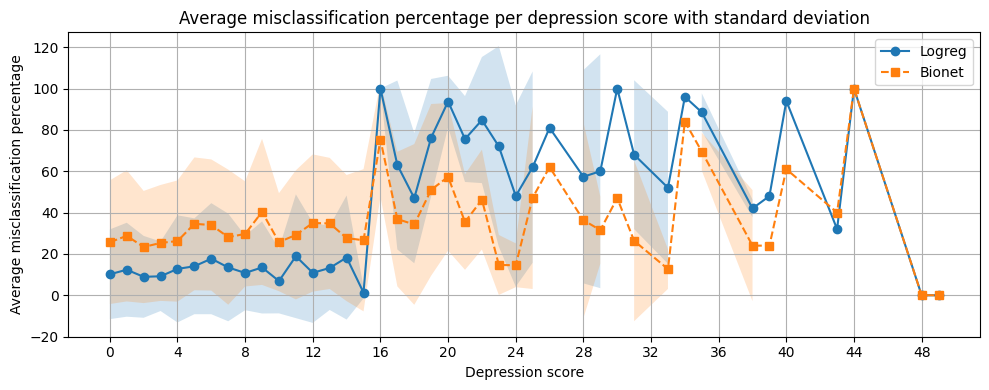

In [168]:
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for logreg
average_wrong_label_percentage_logreg = logreg_misclass.groupby('depression_score')['wrong_label_percentage'].agg(['mean', 'std']).reset_index()

# Calculate mean and standard deviation for bionet
average_wrong_label_percentage_bionet = bionet_misclass.groupby('depression_score')['wrong_label_percentage'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 4))

# Plot for logreg with standard deviation
plt.plot(average_wrong_label_percentage_logreg['depression_score'], 
         average_wrong_label_percentage_logreg['mean'], 
         marker='o', linestyle='-', label='Logreg')
plt.fill_between(average_wrong_label_percentage_logreg['depression_score'], 
                 average_wrong_label_percentage_logreg['mean'] - average_wrong_label_percentage_logreg['std'], 
                 average_wrong_label_percentage_logreg['mean'] + average_wrong_label_percentage_logreg['std'], 
                 alpha=0.2)

# Plot for bionet with standard deviation
plt.plot(average_wrong_label_percentage_bionet['depression_score'], 
         average_wrong_label_percentage_bionet['mean'], 
         marker='s', linestyle='--', label='Bionet')
plt.fill_between(average_wrong_label_percentage_bionet['depression_score'], 
                 average_wrong_label_percentage_bionet['mean'] - average_wrong_label_percentage_bionet['std'], 
                 average_wrong_label_percentage_bionet['mean'] + average_wrong_label_percentage_bionet['std'], 
                 alpha=0.2)

plt.xlabel('Depression score')
plt.ylabel('Average misclassification percentage')
plt.title('Average misclassification percentage per depression score with standard deviation')
plt.grid(True)

# Set x-axis ticks to every 4 steps, while maintaining the grid for every score step
plt.xticks(range(min(average_wrong_label_percentage_logreg['depression_score']), 
                 max(average_wrong_label_percentage_logreg['depression_score']) + 1, 4))

# Add minor grid lines for every score step
plt.grid(which='minor', axis='x', linestyle='--', alpha=0.5)

# Add legend
plt.legend()

plt.tight_layout()
# plt.savefig('misclassified_per_score_with_std.png', dpi=300)
plt.show()